# 🧌 Monstrinho 3.6

Não é possível. Mais um dia amanhece em LUMI e mais um monstro ataca o reino. Está na hora de acabar com isso. Para acabar com esse monstro, vamos continuar usando nossos aprendizados em Redes Neurais, construindo uma rede do zero, como nosso mago Mor nos ensinou, e criar uma curva de aprendizado. Então, vamos lá!

Só para iniciarmos, vamos colocar aqui as classes importantes para criar uma rede neural do zero:

- `Valor`
- `Neurônio`
- `Camada`
- `MLP`

## 🔢 Valor

Esta é a classe Valor, que representa um valor numérico com suporte a diferenciação automática. Ela possui métodos para operações matemáticas, como adição, subtração, multiplicação e exponenciação, além de métodos para calcular a função sigmoide e backpropagation. É notório lembrar que seja possível realizar os cálculos mesmo com ordem invertida, onde o objeto Valor pode ser o primeiro ou segundo operando.

In [1]:
import math

class Valor:
    """
    Classe que representa um valor numérico com suporte a diferenciação automática.
    
    Cada instância armazena:
      - data: o valor numérico.
      - progenitor: tupla com os valores dos quais este foi derivado.
      - operador_mae: string representando a operação que gerou o valor.
      - grad: gradiente (inicialmente zero) usado no backpropagation.
    """
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""):
        """
        Inicializa uma instância de Valor.
        
        Args:
            data (float): o valor numérico.
            progenitor (tuple): valores anteriores que contribuíram para este.
            operador_mae (str): operação que gerou o valor.
            rotulo (str): rótulo opcional para identificação.
        """
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo
        self.grad = 0

    def __repr__(self):
        """Retorna uma representação string simplificada do objeto."""
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        """
        Sobrecarga do operador de adição.
        
        Realiza a operação: self + outro_valor.
        
        Args:
            outro_valor (Valor ou número): valor a ser somado.
        
        Returns:
            Valor: novo objeto representando a soma.
        """
        if not isinstance(outro_valor, Valor):
            outro_valor = Valor(outro_valor)
            
        progenitor = (self, outro_valor)
        data = self.data + outro_valor.data
        operador_mae = "+"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_adicao():
            self.grad += resultado.grad
            outro_valor.grad += resultado.grad
            
        resultado.propagar = propagar_adicao
        
        return resultado

    def __mul__(self, outro_valor):
        """
        Sobrecarga do operador de multiplicação.
        
        Realiza a operação: self * outro_valor.
        
        Args:
            outro_valor (Valor ou número): valor a ser multiplicado.
        
        Returns:
            Valor: novo objeto representando o produto.
        """
        if not isinstance(outro_valor, Valor):
            outro_valor = Valor(outro_valor)
            
        progenitor = (self, outro_valor)
        data = self.data * outro_valor.data
        operador_mae = "*"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_multiplicacao():
            self.grad += resultado.grad * outro_valor.data
            outro_valor.grad += resultado.grad * self.data
            
        resultado.propagar = propagar_multiplicacao
        
        return resultado

    def exp(self):
        """
        Calcula a exponencial do valor.
        
        Realiza a operação: exp(self).
        
        Returns:
            Valor: novo objeto representando a exponencial.
        """
        progenitor = (self, )
        data = math.exp(self.data)
        operador_mae = "exp"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_exp():
            self.grad += resultado.grad * data 
        
        resultado.propagar = propagar_exp
        
        return resultado

    def __pow__(self, expoente):
        """
        Sobrecarga do operador de exponenciação.
        
        Realiza a operação: self ** expoente.
        
        Args:
            expoente (int ou float): expoente da operação.
        
        Returns:
            Valor: novo objeto representando a exponenciação.
        """
        assert isinstance(expoente, (int, float)), "Expoente deve ser um número."
        progenitor = (self, )
        data = self.data ** expoente
        operador_mae = f"**{expoente}"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_pow():
            self.grad += resultado.grad * (expoente * self.data ** (expoente - 1))
        
        resultado.propagar = propagar_pow
        
        return resultado

    def __truediv__(self, outro_valor):
        """
        Sobrecarga do operador de divisão.
        
        Realiza a operação: self / outro_valor.
        
        Args:
            outro_valor (Valor ou número): divisor.
        
        Returns:
            Valor: novo objeto representando a divisão.
        """
        return self * outro_valor ** (-1)

    def __neg__(self):
        """
        Sobrecarga do operador de negação.
        
        Realiza a operação: -self.
        
        Returns:
            Valor: novo objeto representando o valor negativo.
        """
        return self * -1

    def __sub__(self, outro_valor):
        """
        Sobrecarga do operador de subtração.
        
        Realiza a operação: self - outro_valor.
        
        Args:
            outro_valor (Valor ou número): valor a ser subtraído.
        
        Returns:
            Valor: novo objeto representando a subtração.
        """
        return self + (-outro_valor)

    def __radd__(self, outro_valor):
        """
        Sobrecarga do operador de adição reversa.
        
        Permite operações onde Valor está à direita: outro_valor + self.
        
        Args:
            outro_valor (Valor ou número): valor a ser somado.
        
        Returns:
            Valor: resultado da adição.
        """
        return self + outro_valor

    def __rmul__(self, outro_valor):
        """
        Sobrecarga do operador de multiplicação reversa.
        
        Permite operações onde Valor está à direita: outro_valor * self.
        
        Args:
            outro_valor (Valor ou número): valor a ser multiplicado.
        
        Returns:
            Valor: resultado da multiplicação.
        """
        return self * outro_valor

    def sig(self):
        """
        Calcula a função sigmoide.
        
        Realiza a operação: exp(self) / (exp(self) + 1).
        
        Returns:
            Valor: novo objeto representando o resultado da sigmoide.
        """
        return self.exp() / (self.exp() + 1)

    def propagar(self):
        """
        Função de propagação (backpropagation) do gradiente.
        
        Este método deve ser sobrescrito pelas operações específicas.
        """
        pass

    def propagar_tudo(self):
        """
        Executa o backpropagation através de todos os nós (valores) conectados.
        
        Atribui gradiente 1 ao vértice folha e propaga recursivamente utilizando uma ordem topológica dos nós.
        """
        self.grad = 1
        ordem_topologica = []
        visitados = set()

        def constroi_ordem_topologica(v):
            if v not in visitados:
                visitados.add(v)
                for progenitor in v.progenitor:
                    constroi_ordem_topologica(progenitor)
                ordem_topologica.append(v)

        constroi_ordem_topologica(self)

        for vertice in reversed(ordem_topologica):
            vertice.propagar()


## 🤓 Neurônio

A classe Neurônio representa um neurônio em uma rede neural. Ela possui pesos e um viés, que são inicializados aleatoriamente. O neurônio calcula a saída usando a função sigmoide e realiza o backpropagation para atualizar os pesos e o viés com base no erro da previsão.

In [2]:
import random


class Neuronio:
    """
    Representa um neurônio simples com pesos e viés para uso em uma rede neural.

    Este neurônio utiliza a classe Valor para armazenar seus parâmetros e realizar a
    diferenciação automática durante o treinamento.
    """

    def __init__(self, num_dados_entrada, ativacao="sigmoid"):
        """
        Inicializa um neurônio com pesos e viés aleatórios.
        
        Args:
            num_dados_entrada (int): número de entradas do neurônio.
            ativacao (str): função de ativação a ser utilizada. Opções: "sigmoid", "relu", "tanh" e "leaky_relu".
        """
        self.vies = Valor(random.uniform(-1, 1))

        self.pesos = []
        for i in range(num_dados_entrada):
            self.pesos.append(Valor(random.uniform(-1, 1)))

        if ativacao == "sigmoid":
            self.ativacao = lambda x: x.sig()
        elif ativacao == "relu":
            self.ativacao = lambda x: x.relu()
        elif ativacao == "tanh":
            self.ativacao = lambda x: x.tanh()
        elif ativacao == "leaky_relu":
            self.ativacao = lambda x: x.leaky_relu()
        else:
            raise ValueError(f"Função de ativação '{ativacao}' não suportada.")

    def __call__(self, x):
        """
        Realiza a passagem forward do neurônio.

        Calcula a soma ponderada das entradas e aplica a função sigmoide para
        determinar a saída do neurônio.

        Args:
            x (list[Valor]): lista de objetos Valor representando as entradas.

        Returns:
            Valor: objeto Valor representando a saída do neurônio.
        """
        assert len(x) == len(
            self.pesos
        ), "O número de entradas deve ser igual ao número de pesos."

        soma = 0
        for info_entrada, peso_interno in zip(x, self.pesos):
            soma += info_entrada * peso_interno

        soma += self.vies

        return self.ativacao(soma)

    def parametros(self):
        """
        Retorna uma lista com os parâmetros do neurônio (pesos e viés).

        Returns:
            list[Valor]: lista contendo os pesos e o viés.
        """
        return self.pesos + [self.vies]

Uma pequena alteração ocorreu na classe `Neuronio` para permitir a utilização de funções de ativação diferentes. Para isso, foi adicionado um parâmetro `ativacao` no construtor da classe. Esse parâmetro pode ser uma função de ativação como `sigmoide`, `relu`, `tanh` ou `leaky_relu`. O método `ativar` agora utiliza essa função de ativação para calcular a saída do neurônio.

## 🎂 Camada

A classe Camada representa uma camada de neurônios em uma rede neural. Ela possui um número específico de neurônios e é responsável por calcular a saída da camada com base nas entradas recebidas. Realiza o forward pass e agrega os parametros de cada neurônio.

In [3]:
class Camada:
    """
    Representa uma camada em uma rede neural composta por múltiplos neurônios.

    Cada camada gerencia um conjunto de neurônios, realizando a passagem forward
    e agregando os parâmetros (pesos e viés) de cada neurônio.
    """

    def __init__(self, num_neuronios, num_dados_entrada, ativacao="sigmoid"):
        """
        Inicializa a camada com um número específico de neurônios, cada um com
        um determinado número de entradas.

        Args:
            num_neuronios (int): número de neurônios na camada.
            num_dados_entrada (int): número de entradas para cada neurônio.
        """
        self.neuronios = []
        for _ in range(num_neuronios):
            neuronio = Neuronio(num_dados_entrada, ativacao=ativacao)
            self.neuronios.append(neuronio)

    def __call__(self, x):
        """
        Realiza a passagem forward na camada.

        Aplica cada neurônio da camada à mesma entrada e retorna os dados de saída.

        Args:
            x (list[Valor]): lista de objetos Valor representando as entradas da camada.

        Returns:
            Valor ou list[Valor]: saída de um único neurônio se houver apenas um,
            ou lista com as saídas de todos os neurônios.
        """
        dados_de_saida = []
        for neuronio in self.neuronios:
            informacao = neuronio(x)
            dados_de_saida.append(informacao)

        if len(dados_de_saida) == 1:
            return dados_de_saida[0]
        else:
            return dados_de_saida

    def parametros(self):
        """
        Agrega e retorna todos os parâmetros (pesos e viés) de cada neurônio da camada.

        Returns:
            list[Valor]: lista contendo todos os parâmetros dos neurônios da camada.
        """
        params = []
        for neuronio in self.neuronios:
            params_neuronio = neuronio.parametros()
            params.extend(params_neuronio)

        return params

A classe `Camada` também foi alterada para permitir a utilização de funções de ativação diferentes. O construtor agora aceita um parâmetro `ativacao` que pode ser uma função de ativação como `sigmoide`, `relu`, `tanh` ou `leaky_relu`. O método `ativar` utiliza essa função de ativação para calcular a saída da camada.

## 🧠 MLP

Por fim, nossa última classe da nossa rede neural é a `MLP` (Multi-Layer Perceptron). Ela representa uma rede neural com múltiplas camadas. A `MLP` organiza as camadas da rede, permitindo a passagem forward dos dados e a agregação dos parâmetros de todas as camadas.

In [4]:
class MLP:
    """
    Representa uma rede neural do tipo MLP (Multi-Layer Perceptron).

    Essa classe organiza as camadas da rede, permitindo a passagem forward dos dados e
    a agregação dos parâmetros (pesos e viés) de todas as camadas.
    """

    def __init__(self, num_dados_entrada, num_neuronios_por_camada, ativacao="sigmoid"):
        """
        Inicializa a MLP com um número definido de entradas e uma lista que especifica
        o número de neurônios em cada camada.

        Args:
            num_dados_entrada (int): número de entradas da rede.
            num_neuronios_por_camada (list[int]): lista com o número de neurônios para cada camada.
        """
        percurso = [num_dados_entrada] + num_neuronios_por_camada

        camadas = []
        for i in range(len(num_neuronios_por_camada)):
            camada = Camada(num_neuronios_por_camada[i], percurso[i], ativacao=ativacao)
            camadas.append(camada)

        self.camadas = camadas

    def __call__(self, x):
        """
        Realiza a passagem forward pela rede.

        Cada camada processa a entrada e o resultado é passado para a próxima camada.

        Args:
            x (list[Valor] ou Valor): dados de entrada para a rede.

        Returns:
            Valor ou list[Valor]: saída final da rede após a passagem por todas as camadas.
        """
        for camada in self.camadas:
            x = camada(x)
        return x

    def parametros(self):
        """
        Agrega e retorna todos os parâmetros (pesos e viés) de todas as camadas da rede.

        Returns:
            list[Valor]: lista contendo os parâmetros de cada camada.
        """
        params = []
        for camada in self.camadas:
            parametros_camada = camada.parametros()
            params.extend(parametros_camada)

        return params

Por fim, a classe `MLP` também foi alterada para permitir a utilização de funções de ativação diferentes. O construtor agora aceita um parâmetro `ativacao` que pode ser uma função de ativação como `sigmoide`, `relu`, `tanh` ou `leaky_relu`. O método `ativar` utiliza essa função de ativação para calcular a saída da rede neural.

## 🏁 Vamos iniciar

Agora que já definimos nossas classes, as importantes classes da nossa Rede Neural feita em Python puro, vamos destrinchar esse monstrinho. O que precisamos fazer é importar alguns dados, realizar o treinamento dessa rede neural, observando a evolução da nossa rede com os dados de treino e as validações, dessa maneira podemos fazer uma curva de aprendizado. As curvas de aprendizado são gráficos usados para mostrar o desempenho de um modelo à medida que o tamanho do conjunto de treinamento aumenta [1].

Vamos começar importando as bibliotecas que vamos usar

In [5]:
import random
import seaborn as sns
import matplotlib.pyplot as plt

Vamos agora pegar o conjunto de dados ``tips`` do **Seaborn** que é um conjunto de dados que contém informações sobre gorjetas em restaurantes. O conjunto de dados inclui colunas como ``total_bill`` (valor total da conta), ``tip`` (gorjeta), ``sex`` (sexo do cliente), ``smoker`` (se o cliente é fumante ou não), ``day`` (dia da semana), ``time`` (refeição) e ``size`` (tamanho da mesa). O objetivo é prever a gorjeta com base no total da conta [2].

In [6]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Para que a nossa rede neural funcione bem, precisamos transformar os dados para a estrutura de dados `Valor` definida pela classe. Além disso, vamos separar também os dados em treino e teste, para que possamos avaliar o desempenho da nossa rede neural.

In [7]:
data = [([Valor(x)], Valor(y)) for x, y in zip(df["total_bill"], df["tip"])]

random.seed(42)
random.shuffle(data)

split = int(0.7 * len(data))

treino = data[:split]
teste = data[split:]

Vamos agora começar a criar a nossa Rede Neural, instanciando a classe `MLP` e criando as camadas. Vamos criar uma rede neural com 3 camadas, sendo a primeira com 10 neurônios, a segunda com 5 neurônios e a terceira com 1 neurônio. Vamos usar a função de ativação `sigmoide` para todas as camadas.

In [8]:
modelo = MLP(
    num_dados_entrada=1, num_neuronios_por_camada=[10, 5, 1], ativacao="sigmoid"
)

TAXA_APRENDIZADO = 0.01
EPOCAS = 50

treino_perda = []
teste_perda = []

Vamos agora executar o treinamento da nossa rede neural, usando os dados de treino.

In [9]:
for ep in range(1, EPOCAS + 1):
    total = Valor(0)
    for p in modelo.parametros():
        p.grad = 0
    for x, y in treino:
        predicao = modelo(x)
        perda = (predicao - y) ** 2
        total = total + perda
    media_treino = total.data / len(treino)
    treino_perda.append(media_treino)
    total.propagar_tudo()
    for p in modelo.parametros():
        p.data -= TAXA_APRENDIZADO * p.grad

    teste_total = 0
    for x, y in teste:
        predicao = modelo(x)
        teste_total += (predicao - y).data ** 2
    teste_perda.append(teste_total / len(teste))

Agora que treinamos e armazenamos os dados, vamos criar uma curva de aprendizado. Vamos plotar o gráfico de erro em relação ao número de épocas, tanto para os dados de treino quanto para os dados de validação.

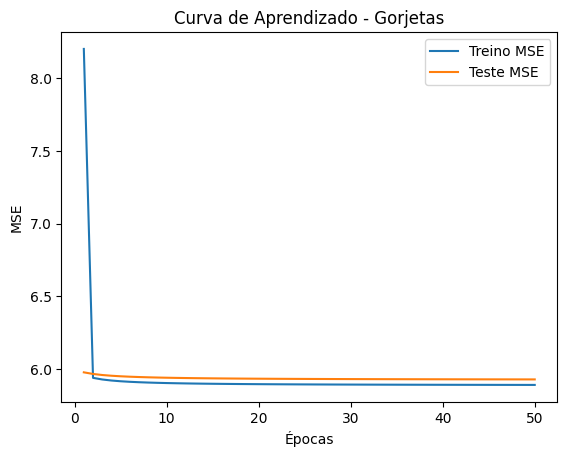

In [10]:
plt.plot(range(1, EPOCAS + 1), treino_perda, label="Treino MSE")
plt.plot(range(1, EPOCAS + 1), teste_perda, label="Teste MSE")
plt.xlabel("Épocas")
plt.ylabel("MSE")
plt.title("Curva de Aprendizado - Gorjetas")
plt.legend()
plt.show()

Bom, agora vamos analisar essa curva de aprendizado. Podemos ver que logo na primeira época o treino despenca de $~8$ para $~6$ de MSE e o erro de teste quase não cai. Isso mostra que a rede captura rapidamente a relação básica entre conta e gorjeta. E depois, as épocas quase se estabilizam, indicando que os gradientes estão ficando muito pequenos para melhorar muito mais.

Podemos perceber que as curvas de treino e teste estão quase sobrepostas, indicando que não há overfitting. Entretanto, o erro absoluto é alto, indicando que a rede neural não está capturando bem a relação entre os dados.

Por exemplo, com um MSE por volta de $6$, o RMSE de $2.45$, ou seja, a média do erro absoluto é de $2.45$ dólares.

In [11]:
df["tip"].mean()

2.99827868852459

Considerando que a média das gorjetas é de $2.99$, o erro médio absoluto é de $2.45$ dólares, o que é um erro considerável. Isso indica que a rede neural não está capturando bem a relação entre os dados.

O que a gente poderia fazer para melhorar isso, seria usar mais parâmetros no conjunto de dados, como o dia da semana, o tamanho da mesa e o sexo do cliente. Além disso, poderíamos usar uma rede neural mais profunda, com mais camadas e neurônios. Essa tarefa fica pro leitor atento.

# 📖 Referências

[1] https://www.datacamp.com/tutorial/tutorial-learning-curves 

[2] https://seaborn.pydata.org/tutorial/introduction.html